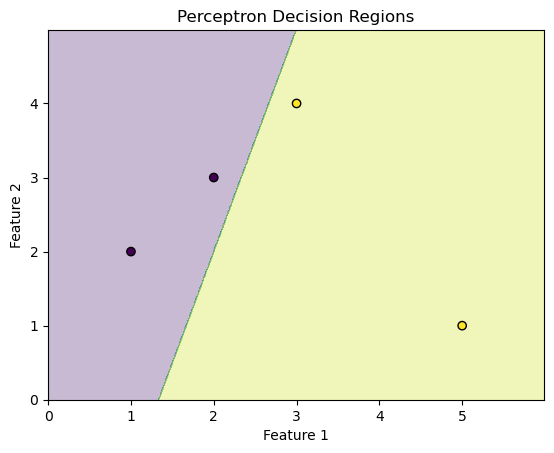

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, x):
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0

def plot_decision_regions(X, y, perceptron):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
    plt.title('Perceptron Decision Regions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example data
X_train = np.array([[2, 3], [1, 2], [3, 4], [5, 1]])
y_train = np.array([0, 0, 1, 1])

# Create and train perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.train(X_train, y_train)

# Plot decision regions
plot_decision_regions(X_train, y_train, perceptron)
